# **Proceso ETL de Preparación de Datos**

Este proceso tiene por objetivo la importación de datos de los casos de COVID de 2020 y 2021 en España, así como su preparación para su posterior uso en Power BI.

In [84]:
import pandas as pd

# Importación de los datos covid
url_casos_prov = "https://raw.githubusercontent.com/raul-ssj/python/main/casos_hosp_uci_def_sexo_edad_provres.csv"
url_casos_ccaa = "https://raw.githubusercontent.com/raul-ssj/python/main/casos_diag_ccaadecl.csv"

df_casos_prov = pd.read_csv(url_casos_prov)
df_casos_ccaa = pd.read_csv(url_casos_ccaa)

print(df_casos_prov)
print(df_casos_ccaa)

       provincia_iso sexo grupo_edad  ... num_hosp  num_uci  num_def
0                  A    H        0-9  ...        0        0        0
1                  A    H      10-19  ...        0        0        0
2                  A    H      20-29  ...        0        0        0
3                  A    H      30-39  ...        0        0        0
4                  A    H      40-49  ...        0        0        0
...              ...  ...        ...  ...      ...      ...      ...
758425            ZA   NC      50-59  ...        0        0        0
758426            ZA   NC      60-69  ...        0        0        0
758427            ZA   NC      70-79  ...        0        0        0
758428            ZA   NC        80+  ...        0        0        0
758429            ZA   NC         NC  ...        0        0        0

[758430 rows x 8 columns]
     ccaa_iso       fecha  ...  num_casos_prueba_elisa  num_casos_prueba_desconocida
0          AN  2020-01-18  ...                       0      

In [85]:
#Filtrado de las filas que contienen datos válidos
df_casos_ccaa_2 = df_casos_ccaa[df_casos_ccaa['ccaa_iso'] != "NC"]
df_casos_prov_2 = df_casos_prov[(df_casos_prov['provincia_iso'] != "NC") & (df_casos_prov['sexo'] != "NC") & (df_casos_prov['grupo_edad'] != "NC")]

print(df_casos_ccaa_2)
print(df_casos_prov_2)

     ccaa_iso       fecha  ...  num_casos_prueba_elisa  num_casos_prueba_desconocida
0          AN  2020-01-18  ...                       0                             0
1          AR  2020-01-18  ...                       0                             0
2          AS  2020-01-18  ...                       0                             0
3          CB  2020-01-18  ...                       0                             0
4          CE  2020-01-18  ...                       0                             0
...       ...         ...  ...                     ...                           ...
8734       MD  2021-04-21  ...                       0                             0
8735       ML  2021-04-21  ...                       0                             0
8737       PV  2021-04-21  ...                       0                             0
8738       RI  2021-04-21  ...                       0                             0
8739       VC  2021-04-21  ...                       0           

In [86]:
# Exportación de datos
path_covid_ccaa = "datos_df_ccaa.csv"
path_covid_prov = "datos_df_provincias.csv"

df_casos_ccaa_2.to_csv(path_covid_ccaa, encoding='utf-8', index=False)
df_casos_prov_2.to_csv(path_covid_prov, encoding='utf-8', index=False)

**Representación de Datos estadísticos y representación para los datos covid (CCAA)**



         num_casos  ...  num_casos_prueba_desconocida
count  8280.000000  ...                   8280.000000
mean    409.147705  ...                      3.819203
std     886.323054  ...                     42.398649
min       0.000000  ...                      0.000000
25%      10.000000  ...                      0.000000
50%      92.000000  ...                      0.000000
75%     381.000000  ...                      0.000000
max    9573.000000  ...                    982.000000

[8 rows x 6 columns]


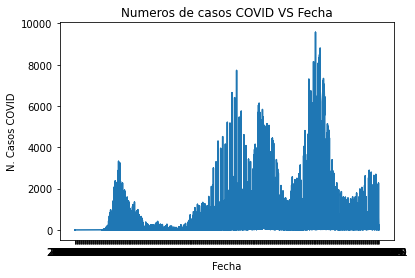

In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamiento por 'fecha' y agrupación por 'fecha'
df_casos_ccaa_2 = df_casos_ccaa_2.sort_values(["fecha"], ascending = (True))

year = df_casos_ccaa_2["fecha"]
num_casos = df_casos_ccaa_2["num_casos"]
plt.title('Numeros de casos COVID VS Fecha')
plt.xlabel('Fecha')
plt.ylabel('N. Casos COVID')
plt.plot(year, num_casos)

print(df_casos_ccaa_2.describe())

**Representación de Datos estadísticos y representación para los datos covid (PROVINCIAS)**

           num_casos       num_hosp        num_uci        num_def
count  446472.000000  446472.000000  446472.000000  446472.000000
mean        7.623047       0.754751       0.069259       0.171758
std        24.174405       3.962982       0.453204       1.292324
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000       0.000000
50%         1.000000       0.000000       0.000000       0.000000
75%         6.000000       0.000000       0.000000       0.000000
max       772.000000     269.000000      35.000000     100.000000


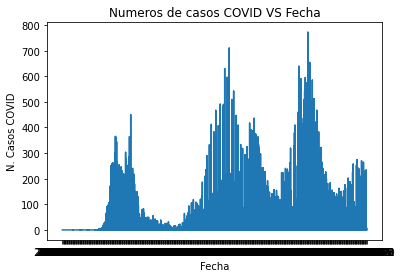

In [88]:
# Ordenamiento por 'fecha' y agrupación por 'fecha'
df_casos_prov_2 = df_casos_prov_2.sort_values(["fecha"], ascending = (True))

year = df_casos_prov_2["fecha"]
num_casos = df_casos_prov_2["num_casos"]
plt.title('Numeros de casos COVID VS Fecha')
plt.xlabel('Fecha')
plt.ylabel('N. Casos COVID')
plt.plot(year, num_casos)

print(df_casos_prov_2.describe())

**Transformación de datos de CCAA**

In [89]:
# Datos de Comunidades Autónomas de España
# Se incluye una nueva categoría "C.A." para referierse a las ciudades autónomas de Ceua y Melilla
url_ccaa = "https://raw.githubusercontent.com/raul-ssj/python/main/ccaa.csv"
df_ccaa = pd.read_csv(url_ccaa)

# Renombrar columnas
df_ccaa = df_ccaa.rename(columns={'Código': 'iso_ccaa', 'Nombre de la subdivisión en la ISO​': 'nombre_ccaa'})

# Eliminar el código del país para dejar únicamente el código de la CCAA
df_ccaa["iso_ccaa"] = df_ccaa["iso_ccaa"].str.replace("ES-", "")

# Nueva entrada para las 'Ciudades Autónomas'
ciudad_autonoma = {'iso_ccaa': 'C.A.', 'nombre_ccaa': 'Ciudad Autónoma'}
df_ccaa = df_ccaa.append(ciudad_autonoma, ignore_index=True)

# Ordenar datos por código ISO
df_ccaa = df_ccaa.sort_values(["iso_ccaa"], ascending = (True))

# Exportar datos a CSV
df_ccaa.to_csv("codigos_ccaa.csv", encoding='utf-8', index=False)

# Imprimir por pantalla
print(df_ccaa)

   iso_ccaa                  nombre_ccaa
0        AN                    Andalucía
1        AR                       Aragón
2        AS       Principado de Asturias
17     C.A.              Ciudad Autónoma
4        CB                    Cantabria
6        CL              Castilla y León
5        CM           Castilla-La Mancha
3        CN                     Canarias
7        CT                     Cataluña
8        EX                  Extremadura
9        GA                      Galicia
10       IB               Islas Baleares
13       MC             Región de Murcia
12       MD          Comunidad de Madrid
14       NC  Comunidad Floral de Navarra
15       PV                   País Vasco
11       RI                     La Rioja
16       VC         Comunidad Valenciana


**Transformación de datos de Provincias**

In [90]:
# Datos de Provincias por CCAA en España
# También se incluyen las ciudades autónomas de Ceua y Melilla dentro de este DataFrame
url_provincias = "https://raw.githubusercontent.com/raul-ssj/python/main/provincias.csv"
df_provincias = pd.read_csv(url_provincias)

# Renombrar columnas
df_provincias = df_provincias.rename(columns={'Código': 'iso_provincia', 'Nombre de la subdivisión en la ISO​': 'nombre_provincia', 'Comunidad autónoma': 'iso_ccaa_fk'})

#Incluir las ciudades autónomas
ceuta = {'iso_provincia': 'ES-CE','nombre_provincia': 'Ceuta', 'iso_ccaa_fk': 'C.A.'}
melilla = {'iso_provincia': 'ES-ML','nombre_provincia': 'Melilla', 'iso_ccaa_fk': 'C.A.'}
df_provincias = df_provincias.append(ceuta, ignore_index=True)
df_provincias = df_provincias.append(melilla, ignore_index=True)

# Eliminar el código del país para dejar únicamente el código de la provincia
df_provincias["iso_provincia"] = df_provincias["iso_provincia"].str.replace("ES-", "") 

# Ordenar datos por código ISO
df_provincias = df_provincias.sort_values(["iso_provincia"], ascending = (True))

# Exportar datos a CSV
df_provincias.to_csv("codigos_provincias.csv", encoding='utf-8', index=False)

# Imprimir por pantalla
print(df_provincias.tail)

<bound method NDFrame.tail of    iso_provincia        nombre_provincia iso_ccaa_fk
3              A               Alicante​          VC
2             AB                Albacete          CM
4             AL                 Almería          AN
6             AV                   Ávila          CL
9              B               Barcelona          CT
7             BA                 Badajoz          EX
10           BI​                 Vizcaya          PV
11            BU                  Burgos          CL
0              C              La Coruña)          GA
13            CA                   Cádiz          AN
12            CC                 Cáceres          EX
50            CE                   Ceuta        C.A.
17            CO                 Córdoba          AN
16            CR             Ciudad Real          CM
15            CS              Castellón​          VC
18            CU                  Cuenca          CM
27           GC​              Las Palmas          CN
20            GI